## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Get the Data

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
len(dataset['User ID'].unique())

400

There are 400 user id in the dataset. As User ID is based on the customer ID and is unique by customer, we will drop the User ID.

In [5]:
len(dataset['Purchased'].unique())

2

# CountPlot of Target Feature

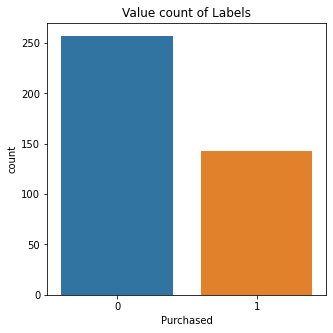

In [6]:
plt.figure(figsize=(5,5))
plt.title('Value count of Labels')
sns.countplot(data=dataset,x='Purchased');

We can observe that the target feature is balanced.

# Value count of gender who Purchase or not

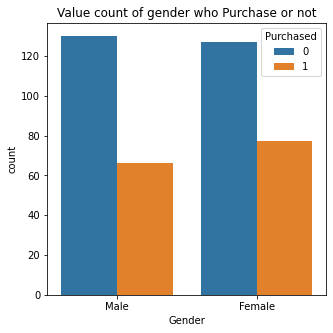

In [7]:
plt.figure(figsize=(5,5))
plt.title('Value count of gender who Purchase or not')
sns.countplot(data=dataset, x='Gender', hue='Purchased');

Most of the male customers are not purchasing after clicking the ad while females have a higher probability of purchasing as compared to males.

## Check for null values

In [8]:
dataset.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<AxesSubplot:>

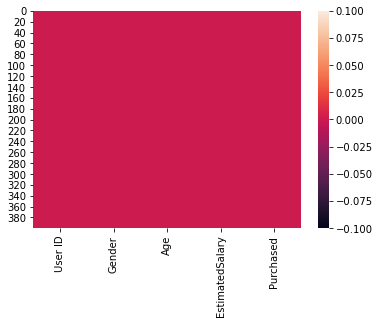

In [9]:
sns.heatmap(dataset.isnull())

In [10]:
dataset.drop(['Gender','User ID'],axis=1,inplace=True)

## Check correlation

In [11]:
dataset.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


## Standardize the Variables

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(dataset.drop('Purchased',axis=1))

StandardScaler()

In [15]:
scaled_features = scaler.transform(dataset.drop('Purchased',axis=1))

In [16]:
type(scaled_features)

numpy.ndarray

In [17]:
scaled_features.dtype

dtype('float64')

In [18]:
df_feat = pd.DataFrame(scaled_features,columns=['Age', 'EstimatedSalary'])
df_feat.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


<AxesSubplot:>

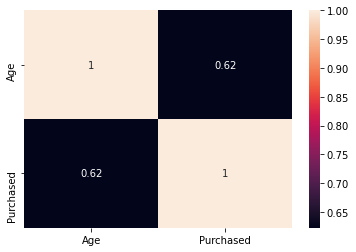

In [19]:
sns.heatmap(dataset[['Age','Purchased']].corr(),annot=True)

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,dataset['Purchased'],
                                                    test_size=0.30,random_state=60)

In [22]:
y_test.shape

(120,)

# Model Building

Building model with different classification Machine Learning algorithms

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [75]:
# creating dictionary of all classifier 
classifiers = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

In [76]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("\nClassifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")


Classifiers:  LogisticRegression Has a training score of 85.0 % accuracy score

Classifiers:  KNeighborsClassifier Has a training score of 91.0 % accuracy score

Classifiers:  DecisionTreeClassifier Has a training score of 88.0 % accuracy score

Classifiers:  RandomForestClassifier Has a training score of 89.0 % accuracy score


- From above results we can see that most of the classifier perfomed quite well, but without hyperparameter tunning we cannot judge above results so quickly.

In [77]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Hyperparameter tunning

In [78]:
# using GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

log_reg_params = {"penalty":['l1','l2'], 'C':[0.001, 0.01, 0.1,1,10,100],'solver':['liblinear']}
grid_log_reg = GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(X_train, y_train)

# C is hyperparameter means lambda
# Best parameters
log_reg = grid_log_reg.best_params_

print(log_reg)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [79]:
# KNN
knn_params = {"n_neighbors":[1,3,5], 'algorithm':['auto']}
grid_knn = GridSearchCV(KNeighborsClassifier(),knn_params)
grid_knn.fit(X_train, y_train)
knn = grid_knn.best_params_
print(knn)

{'algorithm': 'auto', 'n_neighbors': 5}


In [80]:
# Decision Tree
tree_params = {'criterion':['gini','entropy'],"max_depth":[2,4,6],"min_samples_leaf":[5,7,9]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
dcTree = grid_tree.best_params_
print(dcTree)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}


In [81]:
# RandomForest
rf_params = {'n_estimators':[100,200,300],'max_features':['auto','sqrt'],"min_samples_leaf":[1,2,4],"bootstrap":[True, False]}
grid_rf = GridSearchCV(RandomForestClassifier(),rf_params)
grid_rf.fit(X_train, y_train)
rf = grid_rf.best_params_
print(rf)

{'bootstrap': True, 'max_features': 'auto', 'min_samples_leaf': 4, 'n_estimators': 200}


# Classifiers After Tunning 

In [82]:
# Logistic Regression
log_reg =  LogisticRegression(C=10, penalty= 'l1', solver= 'liblinear')
log_reg.fit(X_train, y_train)
log_score = cross_val_score(log_reg, X_train, y_train,cv=5)
print('Logistic Regression: ', round(log_score.mean(),2)*100, "% accuracy score")

# KNeighbors
knn = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5)
knn.fit(X_train, y_train)
knn_score = cross_val_score(knn, X_train, y_train,cv=5)
print("\nKNeighbors: ", round(knn_score.mean(),2)*100, "% accuracy score")

# Decision Tree
dcTree = DecisionTreeClassifier(criterion= 'gini', max_depth= 2, min_samples_leaf= 5)
dcTree.fit(X_train, y_train)
dcTree_score = cross_val_score(dcTree, X_train, y_train, cv=5)
print("\nDecision Tree: ", round(dcTree_score.mean(),2)*100, "% accuracy score")

# Random Forest
rf = RandomForestClassifier(bootstrap= True, max_features= 'sqrt', min_samples_leaf= 2, n_estimators= 100)
rf.fit(X_train, y_train)
rf_score = cross_val_score(rf, X_train, y_train, cv=5)
print("\nRandom Forest: ",  round(rf_score.mean(),2)*100, "% accuracy score")


Logistic Regression:  85.0 % accuracy score

KNeighbors:  91.0 % accuracy score

Decision Tree:  92.0 % accuracy score

Random Forest:  91.0 % accuracy score


# Accuracy scores before tuning || after tuning

LogisticRegression: 85.0 % || 85.0%

KNeighborsClassifier: 91.0 || 91.0%

DecisionTreeClassifier: 89.0 % || 92.0%

RandomForestClassifier: 89.0 % || after: 91.0%

 Logistic regresson and KNN has same accuray before and after tunning.but Decision Tree and random forest accurya increase by 3% and 2%

# Model Evaluation

In [84]:
# predict probabilities ON Train data
log_reg_proba = log_reg.predict_proba(X_train) 
knn_proba = knn.predict_proba(X_train)
dt_proba = dcTree.predict_proba(X_train)
rf_proba = rf.predict_proba(X_train)

In [86]:
# predict probabilities on Test Data
log_reg_proba_test = log_reg.predict_proba(X_test) 
knn_proba_test = knn.predict_proba(X_test)
dt_proba_test = dcTree.predict_proba(X_test)
rf_proba_test = rf.predict_proba(X_test)

# Model Selection

In [87]:
from sklearn.metrics import classification_report
log_reg_preds = log_reg.predict(X_test)
rf_preds = rf.predict(X_test)
knn = knn.predict(X_test)
dcTree = dcTree.predict(X_test)

print("Classification Report of Logisitic Regression: \n", classification_report(y_test, log_reg_preds))
print("-"*70)
print("Classification Report of Random Forest: \n", classification_report(y_test, rf_preds))
print("-"*70)
print("Classification Report of KNN: \n", classification_report(y_test, knn))
print("-"*70)
print("Classification Report of Decision Tree: \n", classification_report(y_test, dcTree))

Classification Report of Logisitic Regression: 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89        82
           1       0.85      0.58      0.69        38

    accuracy                           0.83       120
   macro avg       0.84      0.77      0.79       120
weighted avg       0.83      0.83      0.82       120

----------------------------------------------------------------------
Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93        82
           1       0.82      0.87      0.85        38

    accuracy                           0.90       120
   macro avg       0.88      0.89      0.89       120
weighted avg       0.90      0.90      0.90       120

----------------------------------------------------------------------
Classification Report of KNN: 
               precision    recall  f1-score   support

           0       0.92   

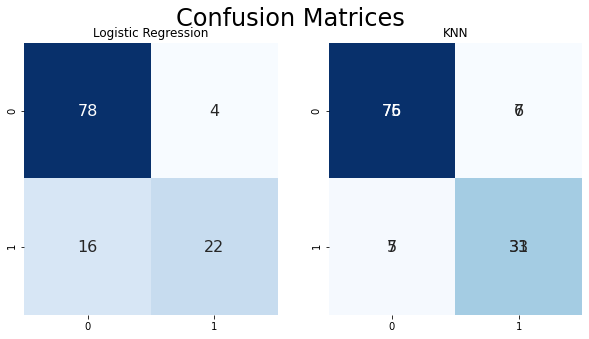

In [93]:
from sklearn.metrics import confusion_matrix
# confusion matrix
log_reg_cm = confusion_matrix(y_test, log_reg_preds)
rf_cm = confusion_matrix(y_test, rf_preds)
knn_cm=confusion_matrix(y_test,knn)

plt.figure(figsize=(10,5))
plt.suptitle("Confusion Matrices ", fontsize=24)

plt.subplot(1,2,1)
plt.title("Logistic Regression")
sns.heatmap(log_reg_cm,cbar=False, cmap="Blues", annot=True,annot_kws={'size':16},fmt='g')

plt.subplot(1,2,2)
plt.title("Random Forest")
sns.heatmap(rf_cm, cbar=False, cmap="Blues",annot=True, annot_kws={'size':16},fmt='g')

plt.subplot(1,2,2)
plt.title("KNN")
sns.heatmap(knn_cm, cbar=False, cmap="Blues",annot=True, annot_kws={'size':16},fmt='g')

plt.show()

In [92]:
print("KNN confusion matrix evaluation: ")
pd.crosstab(y_test, knn, rownames=['Actual'],colnames=['Predicted'], margins=True)

KNN confusion matrix evaluation: 


Predicted,0,1,All
Actual,,,
0,76,6,82
1,7,31,38
All,83,37,120


# Great Job!